## <span style="font-family:Bauhaus 93; font-weight:bold;font-size:3.2em;color:Orange;">spam and Ham mail detection

## Data decription:The data is related to Spam and Ham mail(inbox mails)  detection 

## Goal: To predict whether mail is spam or Ham

 ### <i> <font color=olive > Importing required libraries

In [56]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
import warnings
warnings.filterwarnings("ignore")



### <i> <font color=olive > Loading the Dataset

In [57]:
raw_mail_data=pd.read_csv("mail_data.csv")
raw_mail_data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [58]:
raw_mail_data['Message'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [59]:
raw_mail_data['Category'].value_counts(normalize=True)

ham     0.865937
spam    0.134063
Name: Category, dtype: float64

In [60]:
raw_mail_data.head()         # To display first five records of our data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [61]:
raw_mail_data.shape        #To know the size of our data

(5572, 2)

In [62]:
raw_mail_data.info()          #To display datatype of each attribute and gives count of attribute

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [63]:
raw_mail_data_num=raw_mail_data.select_dtypes(include=np.number)          #Numeric fields
raw_mail_data_cat=raw_mail_data.select_dtypes(exclude=np.number)          #Categorical fields
print("Numerical fields\t:",len(raw_mail_data_num.columns))  
print("Categorical fields\t:",len(raw_mail_data_cat.columns))  

Numerical fields	: 0
Categorical fields	: 2


 1. Our dataset contains a 5K records with 2 attributes
 2. Its consists 0 numeric and 2 categorical fields

In [64]:
raw_mail_data.isnull().sum()   #To check the missing values

Category    0
Message     0
dtype: int64

## Here we noticed there are no missing values 

In [65]:
raw_mail_data.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


#  There is two unique labels.
# There are some repeated messages as unique is less that the count due to some comman messages.

### <i> <font color=olive > EDA

<AxesSubplot:xlabel='Category', ylabel='count'>

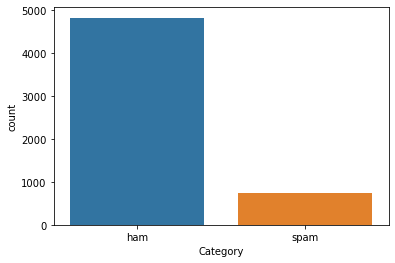

In [66]:
sns.countplot(x='Category', data=raw_mail_data)

##   this graph shows the  less no of spam mails as compared to Ham mails(inbox mails).so it is an imbalanced data.

### <i> <font color=olive > Label encoding

In [67]:
raw_mail_data.loc[raw_mail_data['Category']=='spam','Category',]=0
raw_mail_data.loc[raw_mail_data['Category']=='ham','Category',]=1        # label spam mail as 0 and ham  mail as 1
raw_mail_data

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will ü b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


# 'Category' column shows 1 as ham mail and 0 as spam mail

In [68]:
# Seperate the data as texts and label
X=raw_mail_data['Message']
Y=raw_mail_data['Category']
print(X)
print(Y)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object
0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


### <i> <font color=olive >Text Preprocessing

In [69]:

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [70]:
# Text preprocessing
# Import library
from nltk.corpus import stopwords
from nltk import *
from nltk.stem import WordNetLemmatizer
# Remove stop words
stop = stopwords.words('english')
raw_mail_data=raw_mail_data['Message'].apply(lambda x: " ".join(w for w in x.split() if w not in stop))



In [71]:
# check a small sample of pre-processed data
raw_mail_data.head()

0    Go jurong point, crazy.. Available bugis n gre...
1                        Ok lar... Joking wif u oni...
2    Free entry 2 wkly comp win FA Cup final tkts 2...
3            U dun say early hor... U c already say...
4            Nah I think goes usf, lives around though
Name: Message, dtype: object

In [72]:
raw_mail_data=raw_mail_data.apply(lambda x: re.sub('  ', '',x ))
raw_mail_data.head()

raw_mail_data=raw_mail_data.apply(lambda x: re.sub('[!@#$:).;,?&]', '', x.lower()))

raw_mail_data.head()

0    go jurong point crazy available bugis n great ...
1                              ok lar joking wif u oni
2    free entry 2 wkly comp win fa cup final tkts 2...
3                  u dun say early hor u c already say
4             nah i think goes usf lives around though
Name: Message, dtype: object

### <i> <font color=olive > Splitting the Test_train split dataset

In [73]:
X_train,X_test, Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [74]:
print(X_test)
print(X_train)
print(Y_train)
print(Y_test)

1078                         Yep, by the pretty sculpture
4028        Yes, princess. Are you going to make me moan?
958                            Welp apparently he retired
4642                                              Havent.
4674    I forgot 2 ask ü all smth.. There's a card on ...
                              ...                        
324     That would be great. We'll be at the Guild. Co...
1163    Free entry in 2 a wkly comp to win FA Cup fina...
86      For real when u getting on yo? I only need 2 m...
4214                     I attended but nothing is there.
90      Yeah do! Don‘t stand to close tho- you‘ll catc...
Name: Message, Length: 1115, dtype: object
1642    Hi , where are you? We're at  and they're not ...
2899          If you r @ home then come down within 5 min
480     When're you guys getting back? G said you were...
3485    Tell my  bad character which u Dnt lik in me. ...
157                           I'm leaving my house now...
                             

In [75]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


## There are total  5571 mails  out of 80% will go to the training data and remaining 20% have test data


In [76]:
print(X_train)

1642    Hi , where are you? We're at  and they're not ...
2899          If you r @ home then come down within 5 min
480     When're you guys getting back? G said you were...
3485    Tell my  bad character which u Dnt lik in me. ...
157                           I'm leaving my house now...
                              ...                        
905     We're all getting worried over here, derek and...
5192    Oh oh... Den muz change plan liao... Go back h...
3980    CERI U REBEL! SWEET DREAMZ ME LITTLE BUDDY!! C...
235     Text & meet someone sexy today. U can find a d...
5157                              K k:) sms chat with me.
Name: Message, Length: 4457, dtype: object


### <i> <font color=olive >Feature extraction

In [77]:
Feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase='True')     
X_train_features=Feature_extraction.fit_transform(X_train)
X_test_features=Feature_extraction.transform(X_test)
print(X_train_features)


    
    
    
    
    
    
    
  

  (0, 4346)	0.3238008504874723
  (0, 2353)	0.2545072203817634
  (0, 6695)	0.3616065178053154
  (0, 5895)	0.415102954745324
  (0, 2719)	0.299459437576315
  (0, 3822)	0.37729728742748087
  (0, 3789)	0.4750235197588447
  (0, 3321)	0.2638802854739516
  (1, 4343)	0.6555659308129219
  (1, 1858)	0.5163195438969705
  (1, 3365)	0.5510421389942982
  (2, 4267)	0.531599749449541
  (2, 6215)	0.43979370278404856
  (2, 6597)	0.40097414833733686
  (2, 5672)	0.32606636481997364
  (2, 3025)	0.3502912545366897
  (2, 3185)	0.3663054742561573
  (3, 4447)	0.18080236341909536
  (3, 3084)	0.14346439189216004
  (3, 2877)	0.30030357190007717
  (3, 5515)	0.16439483489485024
  (3, 6922)	0.13381964389308706
  (3, 7080)	0.19700844583868773
  (3, 5535)	0.30030357190007717
  (3, 7398)	0.19877707762085306
  :	:
  (4454, 397)	0.31848634658760416
  (4454, 4027)	0.2561192223695296
  (4454, 6409)	0.2511086901671169
  (4454, 7382)	0.23350338191116915
  (4454, 4578)	0.28626353932821713
  (4455, 6600)	0.3164025961524856
  (4

In [78]:
type(X_train_features)

scipy.sparse.csr.csr_matrix

In [79]:
print(Y_train)

1642    1
2899    1
480     1
3485    1
157     1
       ..
905     1
5192    1
3980    1
235     0
5157    1
Name: Category, Length: 4457, dtype: object


In [80]:
Y_train=Y_train.astype('int')
Y_test=Y_test.astype('int')

In [81]:
print(Y_train)
print(Y_test)

1642    1
2899    1
480     1
3485    1
157     1
       ..
905     1
5192    1
3980    1
235     0
5157    1
Name: Category, Length: 4457, dtype: int32
1078    1
4028    1
958     1
4642    1
4674    1
       ..
324     1
1163    0
86      1
4214    1
90      1
Name: Category, Length: 1115, dtype: int32


#### <i> <font color=olive >Model predicting

In [82]:
from sklearn.linear_model import LogisticRegression  

In [83]:
model=LogisticRegression(C=0.001,random_state=10,max_iter=5000)
model.fit(X_train_features,Y_train)

LogisticRegression(C=0.001, max_iter=5000, random_state=10)

In [84]:
model.intercept_

array([1.86035338])

In [85]:
model.coef_

array([[-1.03782894e-03, -4.97799490e-03, -4.85734059e-04, ...,
         2.13373811e-05,  2.56243226e-05,  5.40558116e-05]])

In [86]:
Y_pred=model.predict(X_train_features)

In [87]:
Y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [88]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_train,Y_pred)


0.8653803006506618

#### <i> <font color=olive >Conclusion

<span style="font-size:1.8em">This shows that our  machine has accuracy of about <b> ~86% </b>to know whether the mail is Spam or not.</font>